In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
data_dir = "/Users/david/Desktop/projects/recipe-recommender/data/"
mean_ratings_filename = "recipes_with_mean_ratings.csv"

In [4]:
if not os.path.isfile(data_dir + mean_ratings_filename):
    !python3 'create_dataset.py'  ## TODO
recipes_with_mean_ratings = pd.read_csv(data_dir + mean_ratings_filename)

<AxesSubplot:xlabel='minutes', ylabel='mean'>

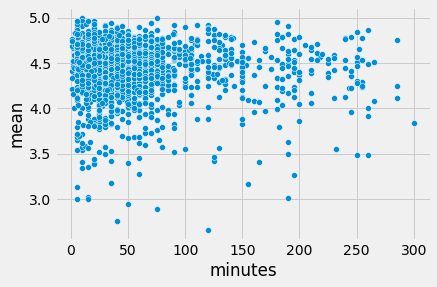

In [5]:
sns.scatterplot(x='minutes', y='mean', data=recipes_with_mean_ratings[(recipes_with_mean_ratings['minutes'] <= 300) & (recipes_with_mean_ratings['count'] > 50)])

In [6]:
recipes_with_mean_ratings[(recipes_with_mean_ratings['minutes'] <= 300) & (recipes_with_mean_ratings['count'] > 50)][['mean', 'minutes']].corr()

,mean,minutes
mean,1.000000,-0.080481
minutes,-0.080481,1.000000


In [7]:
recipes_with_mean_ratings.ingredients.explode()

0          ['sugar-free jello', 'gelatin', 'boiling water']
1         ['lime', 'watermelon', 'cucumber', 'green onio...
2                     ['bananas', 'peanut butter', 'honey']
3         ['garlic cloves', 'onion', 'carrots', 'red bel...
4         ['spinach', 'carrots', 'celery ribs', 'onion',...
                                ...                        
226652    ['mayonnaise', 'prepared horseradish', 'worces...
226653    ['white rice', 'vegetable oil', 'onion', 'gree...
226654    ['celery', 'onion', 'green sweet pepper', 'gar...
226655    ['paprika', 'salt', 'garlic powder', 'onion po...
226656    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
Name: ingredients, Length: 226657, dtype: object

In [8]:
recipes_with_mean_ratings.ingredients[:3].explode()

0     ['sugar-free jello', 'gelatin', 'boiling water']
1    ['lime', 'watermelon', 'cucumber', 'green onio...
2                ['bananas', 'peanut butter', 'honey']
Name: ingredients, dtype: object

In [9]:
ingredients = recipes_with_mean_ratings.ingredients.apply(eval).explode(ignore_index=True)

In [10]:
len(ingredients)

2052191

In [11]:
k = 20
top_k_ingredients = ingredients.groupby(ingredients).size().sort_values(ascending=False).head(k)

In [12]:
num_unique_ingredients = len(ingredients.unique())

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


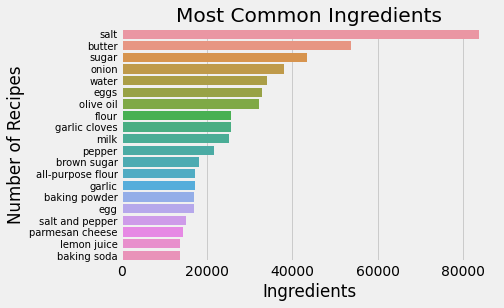

In [13]:
ax = sns.barplot(top_k_ingredients.values, top_k_ingredients.index)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel='Ingredients', ylabel='Number of Recipes', title='Most Common Ingredients')
plt.show()

### Stemming Ingredients

In [14]:
from nltk.stem.porter import *

In [15]:
stemmer = PorterStemmer()
print(stemmer.stem("milk"))

milk


In [16]:
# ingredients to merge later:
# garlic, garlic cloves
# salt and pepper
# all-purpose flour

In [17]:
[stemmer.stem(ingredient) for ingredient in top_k_ingredients.keys()]

['salt',
 'butter',
 'sugar',
 'onion',
 'water',
 'egg',
 'olive oil',
 'flour',
 'garlic clov',
 'milk',
 'pepper',
 'brown sugar',
 'all-purpose flour',
 'garlic',
 'baking powd',
 'egg',
 'salt and pepp',
 'parmesan chees',
 'lemon juic',
 'baking soda']

In [18]:
replacements = {
    'garlic cloves': ['garlic'],
    'salt and pepper': ['salt', 'pepper'],
    'all-purpose flour': ['flour'],
    '&': ['and']
}

In [22]:
""" 
Basic check for duplicate ingredients that checks whether ingredient x is in ingredient y 
or vice versa (based on the the string)
ex. gelatin, jello gelatin --> counted as a duplicate and printed out since gelatin is in both ingredient names
"""
def check_duplicate_ingredients(ingredients, count = 25):
    unique_ingredients = ingredients.unique()
    for x in unique_ingredients:
        for y in unique_ingredients:
            if x != y:
                if x in y or y in x:
                    print(x + ", " + y)
                    count -= 1
                    if count < 0:
                        return
check_duplicate_ingredients(ingredients)

sugar-free jello, sugar
gelatin, peach gelatin
gelatin, berry gelatin
gelatin, lime jell-o gelatin
gelatin, lemon jell-o gelatin
gelatin, strawberry jell-o gelatin dessert
gelatin, unflavored gelatin
gelatin, sugar-free lime gelatin
gelatin, raspberry jell-o gelatin
gelatin, jello gelatin
gelatin, orange-pineapple flavored gelatin
gelatin, sugar-free peach gelatin mix
gelatin, sugar-free raspberry gelatin
gelatin, apricot gelatin
gelatin, raspberry gelatin powder
gelatin, berry blue gelatin mix
gelatin, gelatin powder
gelatin, pineapple gelatin mix
gelatin, orange gelatin
gelatin, strawberry gelatin
gelatin, lime gelatin
gelatin, lemon gelatin
gelatin, plain gelatin
gelatin, sugar-free strawberry gelatin
gelatin, black cherry gelatin
gelatin, cherry gelatin
gelatin, blueberry gelatin
gelatin, sugar-free blackberry gelatin
gelatin, sugar-free lemon gelatin
gelatin, sugar-free orange gelatin
gelatin, sugar-free cherry gelatin
gelatin, sugar-free black cherry gelatin
gelatin, cranberry je

In [ ]:
# Words to remove:
# fresh
# diced
# minced

### EDA

In [32]:
recipes_with_mean_ratings.head()

,name,recipe_id,minutes,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,mean,count
0,0 carb 0 cal gummy worms,283618,45,"['60-minutes-or-less', 'time-to-make', 'course...","[384.7, 0.0, 0.0, 70.0, 159.0, 0.0, 6.0]",15,"['stir all ingredients until dissolved', 'pour...",these are delicious and guilt free!\r\n\r\n*if...,"['sugar-free jello', 'gelatin', 'boiling water']",3,3.800000,5
1,0 fat chunky watermelon salsa,176996,45,"['60-minutes-or-less', 'time-to-make', 'course...","[57.7, 0.0, 39.0, 0.0, 2.0, 0.0, 4.0]",6,['using a small sharp knife cut peel and white...,this is fantastic served with grilled seafood ...,"['lime', 'watermelon', 'cucumber', 'green onio...",8,5.000000,1
2,0 point ice cream only 1 ingredient,480558,125,"['time-to-make', 'course', 'main-ingredient', ...","[304.1, 13.0, 121.0, 3.0, 13.0, 9.0, 19.0]",5,"['1) peel your bananas first', '2) cut them in...",yummy!! (got this recipe from \r\nhttp://www.t...,"['bananas', 'peanut butter', 'honey']",3,5.000000,1
3,0 point soup ww,391705,55,"['60-minutes-or-less', 'time-to-make', 'course...","[26.8, 0.0, 11.0, 5.0, 2.0, 0.0, 1.0]",5,"['put first 12 ingredients in a large pot', 'c...",another 0 point soup -- just clock full of veg...,"['garlic cloves', 'onion', 'carrots', 'red bel...",14,4.777778,9
4,0 point soup crock pot,416980,305,"['course', 'main-ingredient', 'preparation', '...","[40.7, 0.0, 17.0, 2.0, 4.0, 0.0, 2.0]",2,['place all ingredients in the crockpot and co...,served by itself is a 0 point meal or with san...,"['spinach', 'carrots', 'celery ribs', 'onion',...",11,5.000000,5


<AxesSubplot:xlabel='mean', ylabel='Count'>

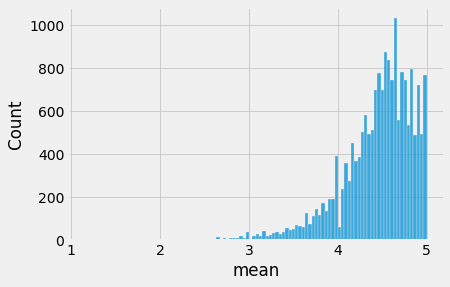

In [33]:
sns.histplot(recipes_with_mean_ratings[recipes_with_mean_ratings['count'] > 10]['mean'])

<AxesSubplot:xlabel='n_steps', ylabel='Count'>

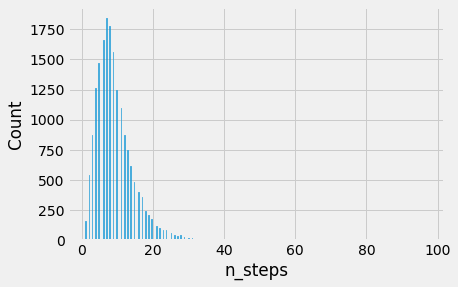

In [34]:
sns.histplot(recipes_with_mean_ratings[recipes_with_mean_ratings['count'] > 10]['n_steps'])

### Model

A basic KNN model to recommend similar recipes (this model does not consider the text features like the ingredients/description/etc.)

In [35]:
from sklearn.neighbors import NearestNeighbors

In [36]:
features = ['minutes', 'n_steps', 'n_ingredients', 'mean', 'count']
X = recipes_with_mean_ratings[features]
neigh = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)

In [37]:
neighbors = neigh.kneighbors([X.iloc[0]], 3, return_distance=False)

In [38]:
recipes_with_mean_ratings.iloc[neighbors[0], :]

,name,recipe_id,minutes,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,mean,count
0,0 carb 0 cal gummy worms,283618,45,"['60-minutes-or-less', 'time-to-make', 'course...","[384.7, 0.0, 0.0, 70.0, 159.0, 0.0, 6.0]",15,"['stir all ingredients until dissolved', 'pour...",these are delicious and guilt free!\r\n\r\n*if...,"['sugar-free jello', 'gelatin', 'boiling water']",3,3.8,5
62082,creme brulee for two,325094,45,"['60-minutes-or-less', 'time-to-make', 'course...","[588.5, 78.0, 101.0, 2.0, 10.0, 153.0, 9.0]",14,"['preheat oven to 300 degrees', 'heat heavy cr...","yummy, easy creme brulee for two. i wanted to...","['heavy cream', 'sugar', 'egg yolks', 'vanilla...",4,4.0,5
88353,gary rhodes homemade crumpets,135356,45,"['celebrity', '60-minutes-or-less', 'time-to-m...","[94.5, 0.0, 0.0, 9.0, 6.0, 0.0, 6.0]",14,"['sift together the flour and salt', 'mix the ...","gary rhodes recipe: ""i love having afternoon t...","['all-purpose flour', 'salt', 'dried yeast', '...",4,4.0,4


### BERT Model
Recommend recipes based solely on recipes with similar ingredients. This model uses pre-trained BERT to embed the ingredients for each recipe. 

In [51]:
import ast
test_input = ' '.join(ast.literal_eval(recipes_with_mean_ratings.ingredients[0]))

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained("bert-base-multilingual-cased")

In [52]:
encoded_input = tokenizer(test_input, return_tensors='pt')
output = model(**encoded_input)

In [53]:
print(output)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0115, -0.4496,  0.0139,  ...,  0.4302, -0.2475,  0.4030],
         [-0.0581, -0.9354,  0.2484,  ...,  0.8812,  0.0735,  0.6537],
         [ 0.0897, -0.6215,  0.4497,  ...,  1.1161, -0.3968,  0.8779],
         ...,
         [-0.1101, -0.8845, -0.0017,  ...,  0.7790, -0.2988,  0.1119],
         [-0.4097, -0.6284, -0.0915,  ...,  0.7148, -0.5852,  0.3193],
         [ 0.0020, -0.6251,  0.1298,  ...,  0.2474, -0.1114,  0.4851]]],
       grad_fn=<NativeLayerNormBackward>), pooler_output=tensor([[ 8.1201e-02, -1.7355e-01,  2.0408e-01, -2.0462e-01, -1.7554e-01,
          1.4221e-01,  2.5156e-01,  3.6050e-02, -1.3868e-01,  5.5324e-02,
         -1.8327e-01,  1.2766e-01,  5.2544e-03,  4.4937e-03,  1.6069e-01,
         -4.6603e-02,  2.2033e-01,  9.6162e-02,  3.4138e-01, -3.3252e-01,
         -9.9260e-01, -3.6023e-01, -6.2497e-02, -2.3191e-01, -1.0482e-01,
          2.8402e-01, -3.7798e-01,  2.8384e-01,  3.1868e-01, -4.0682